In [1]:
cd .. 

/home/philippjfr/topographica


In [2]:
import external
import topo
import imagen as ig
import numpy as np
import holoviews as hv
%reload_ext holoviews.ipython

In [3]:
from featuremapper.analysis import spatialtuning
reload(spatialtuning)

<module 'featuremapper.analysis.spatialtuning' from '/home/philippjfr/topographica/external/featuremapper/featuremapper/analysis/spatialtuning.pyc'>

In [4]:
from components.lespi import ModelSEPI

/home/philippjfr/miniconda/envs/science/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)


In [5]:
import topo
from topo.analysis import Collector
from topo.submodel.earlycalibrated import ModelCalibratedLGN
from topo.submodel.gcal import ArraySpec
from topo.submodel.scal import ModelSCAL

from topo.command import runscript  # In order to check the model files load correctly
from featuremapper.command import measure_size_response, measure_frequency_response, measure_response
from featuremapper.analysis.spatialtuning import SizeTuningPeaks, Size_iDoGModel, Size_DivDoGModel, SF_DoGModel
from topo.misc.lancext import RunBatchCommand, topo_metadata

In [123]:
topo.sim.model = ModelSEPI(area=2.0, num_inputs=1, target_activity=0.024, 
                           pv_strength=3, latpv_strength=3, latpv_lr=0.25, locexc_strength=3.0)
sepi = topo.sim.model.specification
sepi()

:HoloMap   [Time]
   :Image   [x,y]   (z)
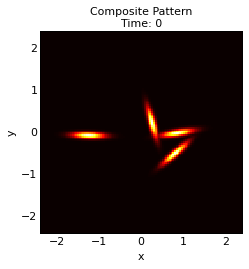
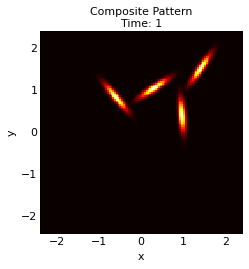
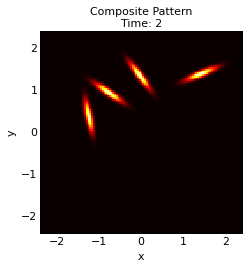
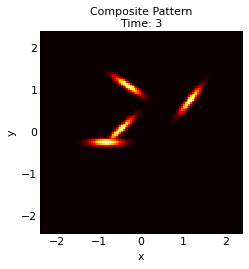
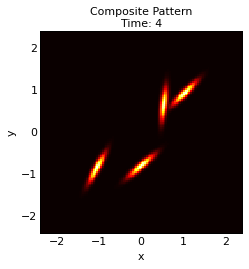
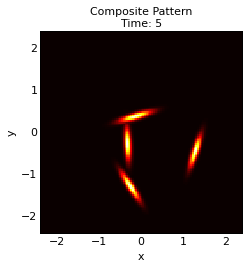
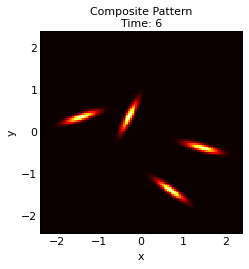
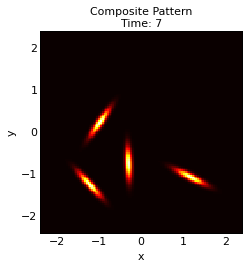
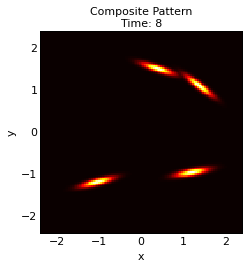
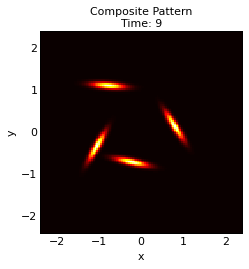
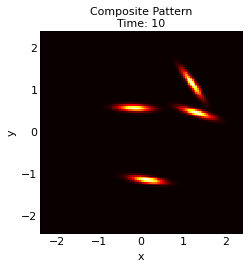

In [124]:
topo.sim.Retina.input_generator.anim(10)

In [11]:
%opts GridSpace [shared_xaxis=True shared_yaxis=True]

:Layout
   .CF_Weight.LateralGC :CFView   [x,y]   (z)
   .CF_Weight.Afferent  :CFView   [x,y]   (z)
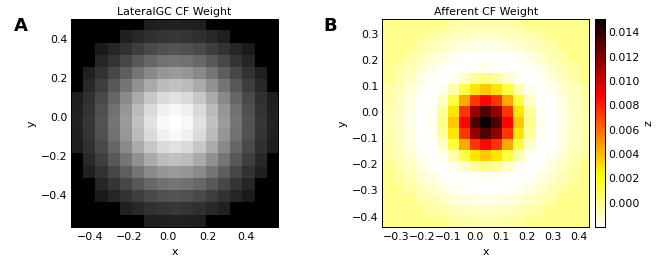

In [12]:
%%opts CFView {+axiswise} CFView.CF_Weight.Afferent (cmap='hot_r') [colorbar=True]
topo.sim.LGNOn.LateralGC.grid(3,3)[0,0].last + topo.sim.LGNOn.Afferent.grid(3,3)[0,0].last

In [8]:
size_response = measure_size_response(outputs=['LGNOn'],num_sizes=21, 
                                      contrasts=[10, 70, 100], max_size=2, durations=[0.15])

100% measurement progress 00:02:59

:Layout
   .Overlay.I                :HoloMap   [Contrast]
      :Overlay
         .SizeTuning_Response.I    :Curve   [Size]   (Response)
         .Response.Size_Tuning_Fit :Curve   [Size]   (Response)
   .ItemTable.IDoG_Model_Fit :HoloMap   [Contrast]
      :ItemTable   (a,b,R_0,K_s,SI,Peak,K_c)
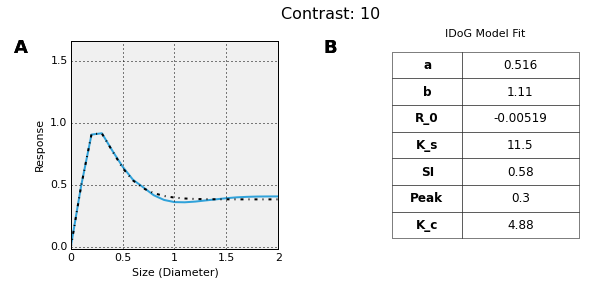
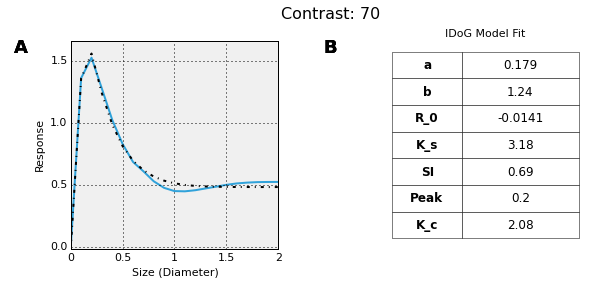
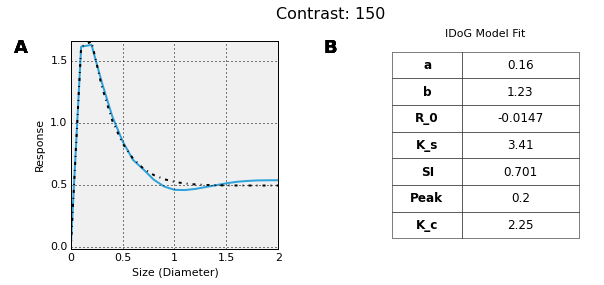

In [12]:
Size_DivDoGModel(size_response.SizeTuning.LGNOn.sample([(0,0)]).to.curve(['Size'], ['Response'])).map(lambda x: x.reindex(), [hv.HoloMap])

:Layout
   .Overlay.I                :HoloMap   [Contrast]
      :Overlay
         .SizeTuning_Response.I    :Curve   [Size]   (Response)
         .Response.Size_Tuning_Fit :Curve   [Size]   (Response)
   .ItemTable.IDoG_Model_Fit :HoloMap   [Contrast]
      :ItemTable   (a,b,R_0,K_s,SI,Peak,K_c)
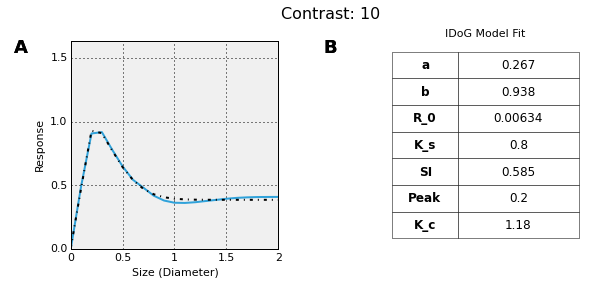
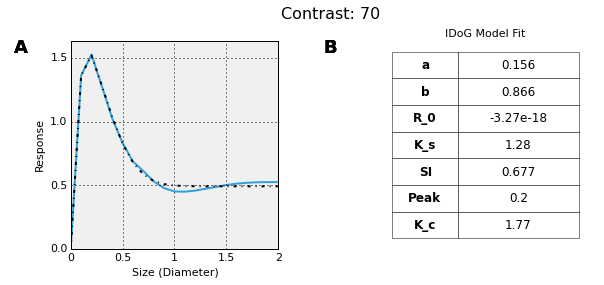
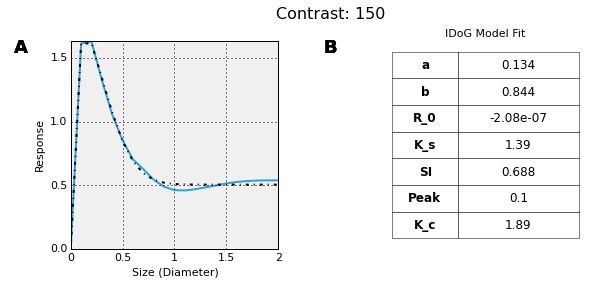

In [11]:
Size_iDoGModel(size_response.SizeTuning.LGNOn.sample([(0,0)]).to.curve(['Size'], ['Response'])).map(lambda x: x.reindex(), [hv.HoloMap])

In [19]:
freq_response = measure_frequency_response(outputs=['LGNOn'],num_freq=21, max_freq=10,
                                           contrasts=[10, 70, 100], size=1, durations=[0.15])

100% measurement progress 00:03:18


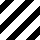
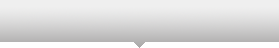
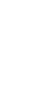
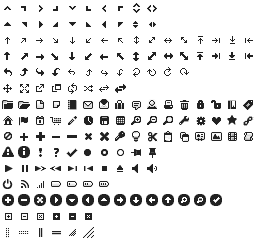
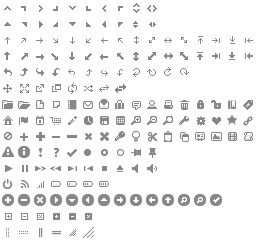
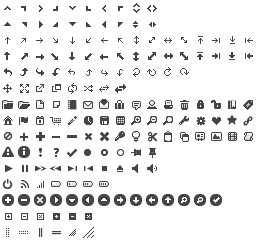
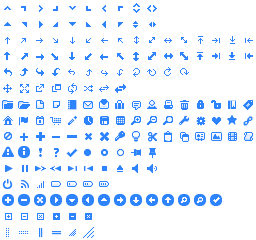
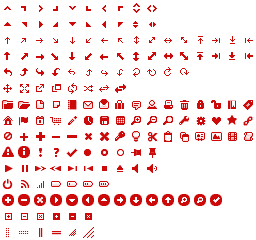
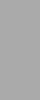
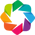
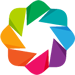
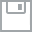
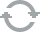
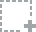
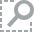
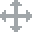
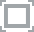
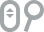

:HoloMap   [X,Y,Time,Duration,Contrast,Frequency]
   :Image   [x,y]   (Response)

In [20]:
%%output widgets='live' backend='bokeh'
freq_response.FrequencyTuning.LGNOn

:HoloMap   [X,Y,Time,Duration,Contrast,x,y]
   :Curve   [Frequency]   (Response)
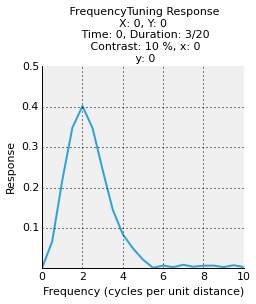
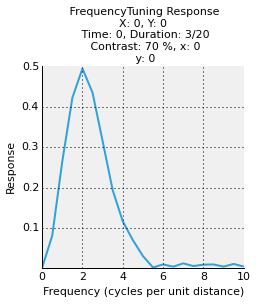
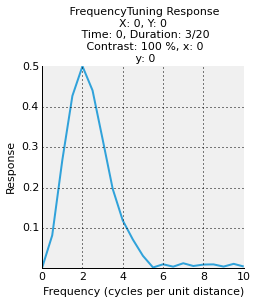

In [21]:
freq_response.FrequencyTuning.LGNOn.sample([(0,0)]).to.curve(['Frequency'], ['Response'])

In [20]:
topo.sim.V1Exc.output_fns[0].t_init=0.14

:Layout
   .GaussianResponse.V1Exc :HoloMap   [Time,Duration]
      :Image   [x,y]   (z)
   .GaussianResponse.V1PV  :HoloMap   [Time,Duration]
      :Image   [x,y]   (z)
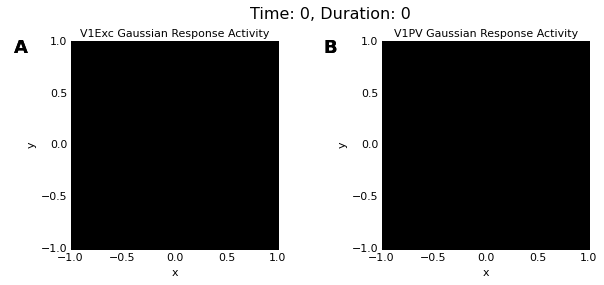
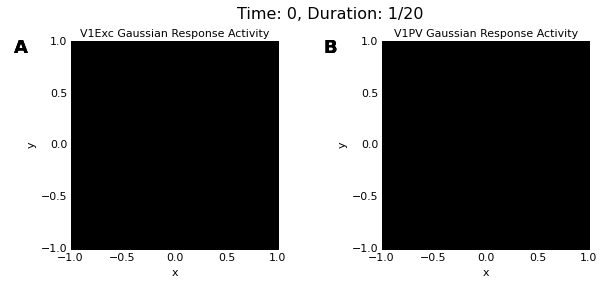
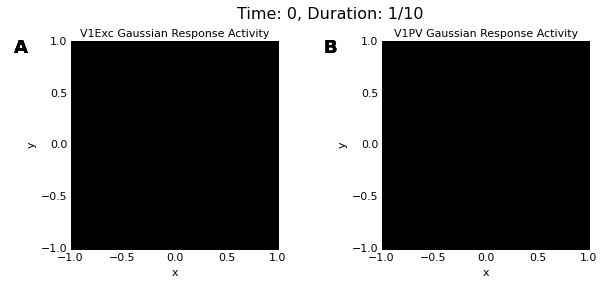
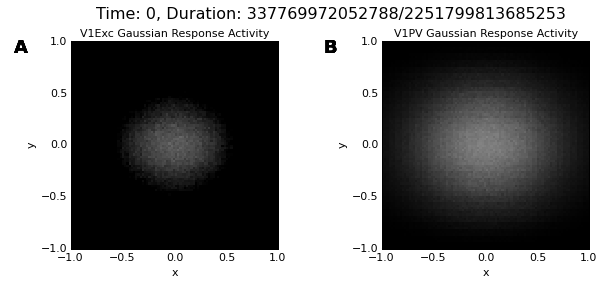
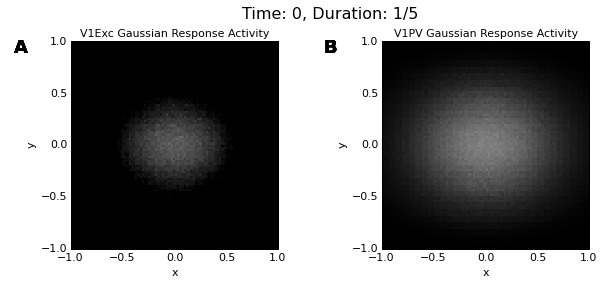
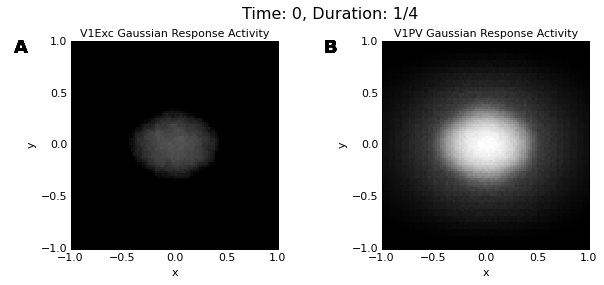
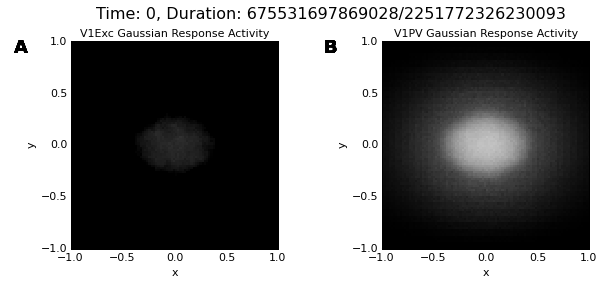
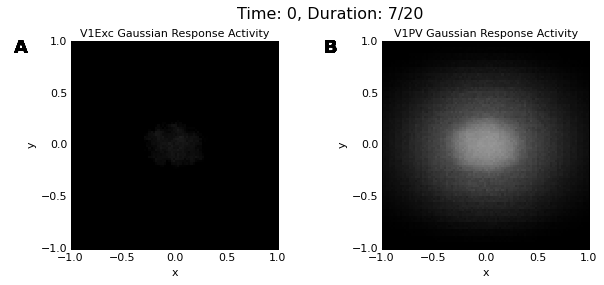
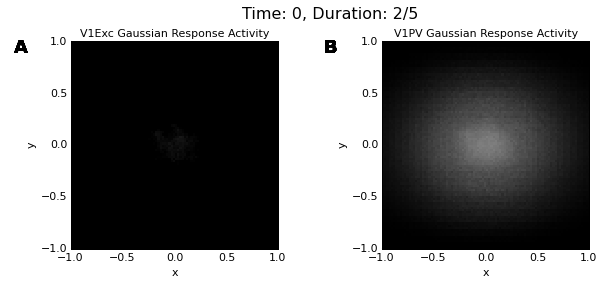
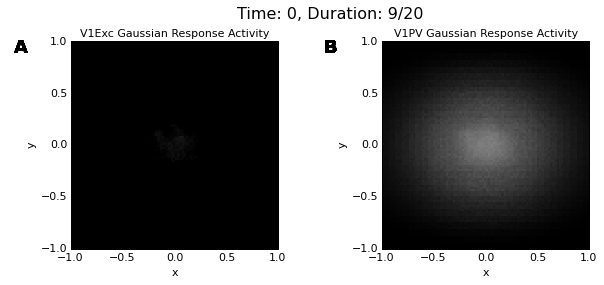
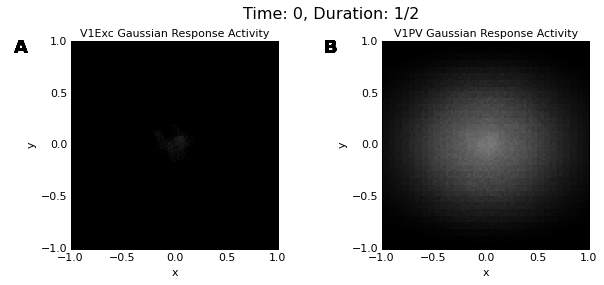
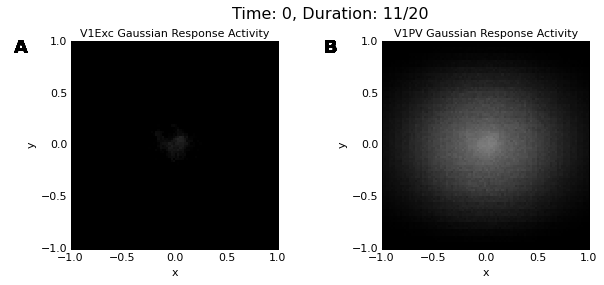
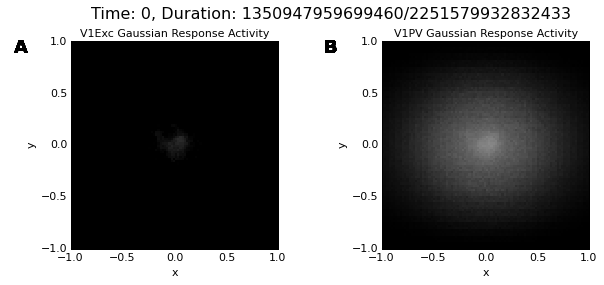
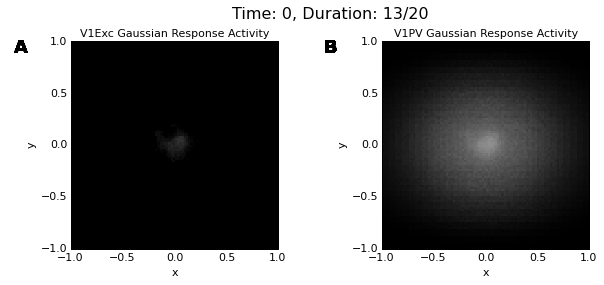
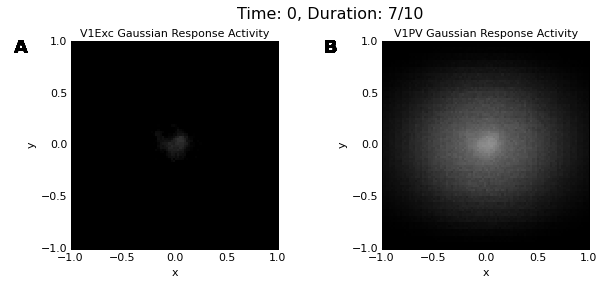
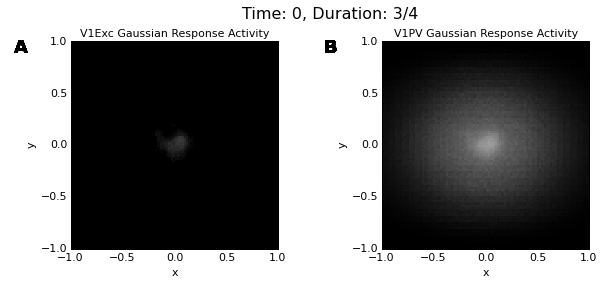
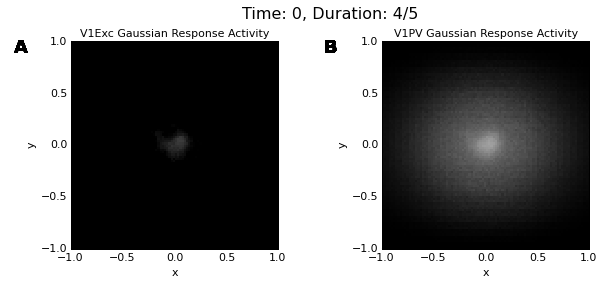
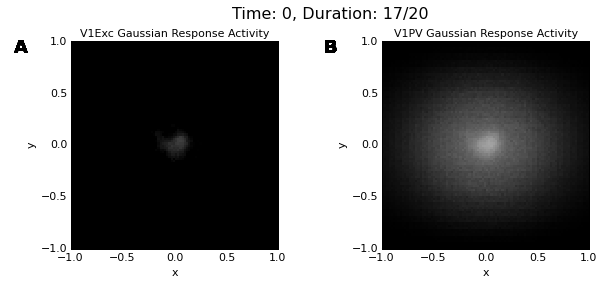
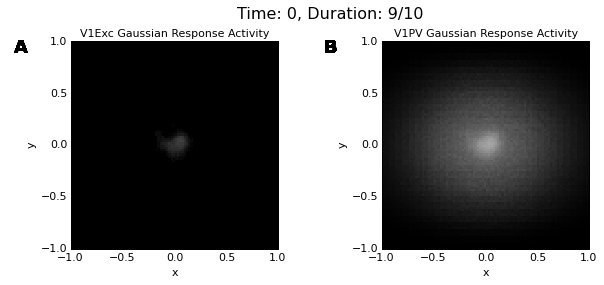
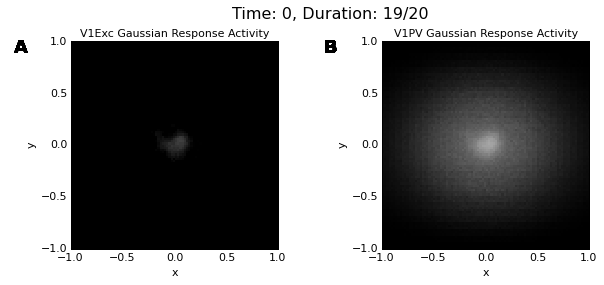

In [21]:
measure_response(durations=np.linspace(0,1,21), outputs=['V1Exc', 'V1PV']).display('all')

In [43]:
from holoviews.ipython.display_hooks import display
from IPython.display import clear_output

In [130]:
%%output backend='bokeh'
for i in range(50):
    clear_output()
    print topo.sim.time()
    display(orpref.OrientationPreference.V1Exc * topo.sim.V1Exc[:] + topo.sim.V1PV[:])
    topo.sim.run(50)

12657


In [131]:
from featuremapper.command import measure_or_pref
orpref = measure_or_pref(frequencies=[1.4, 1.6])

Progress:
[                                                                      ] 0.0%Progress:
[                                                                      ] 0.0%
Progress:
[                                                                      ] 0.0%
Progress:
[                                                                      ] 0.0%
Progress:
[                                                                      ] 0.0%
Progress:
100% measurement progress 00:00:49

:Layout
   .Orientation_Preference.V1Exc.I  :HoloMap   [Time,Duration]
      :Image   [x,y]   (Orientation Preference)
   .Orientation_Preference.V1Exc.II :HoloMap   [Time,Duration]
      :Overlay
         .Orientation_Preference.V1Exc  :Image   [x,y]   (Orientation Preference)
         .Orientation_Selectivity.V1Exc :Image   [x,y]   (Orientation Selectivity)
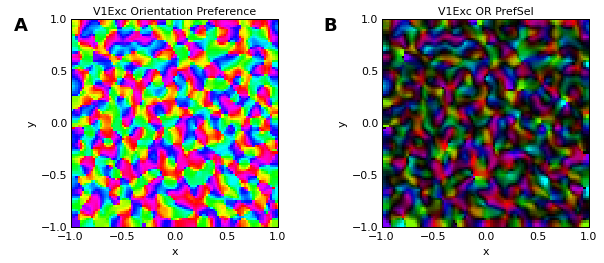

In [132]:
orpref.OrientationPreference.V1Exc + orpref.OrientationPreference.V1Exc * orpref.OrientationSelectivity.V1Exc


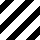
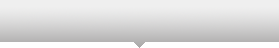
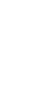
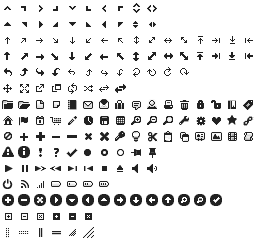
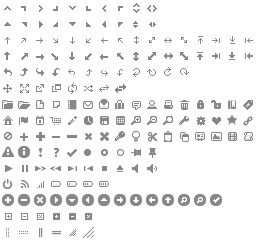
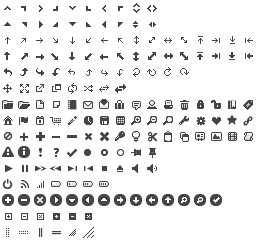
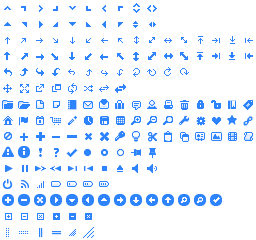
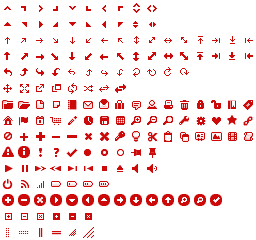
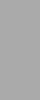
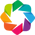
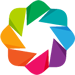
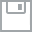
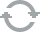
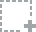
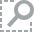
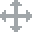
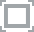
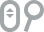

:Layout
   .Activity.Retina              :Image   [x,y]   (z)
   .Activity.LGNOn               :Image   [x,y]   (z)
   .Orientation_Preference.V1Exc :HoloMap   [Time,Duration]
      :Overlay
         .Orientation_Preference.V1Exc :Image   [x,y]   (Orientation Preference)
         .Activity.V1Exc               :Image   [x,y]   (z)

In [119]:
%%output backend='bokeh'
topo.sim.run(1)
(topo.sim.Retina[:] +topo.sim.LGNOn[:] + orpref.OrientationPreference.V1Exc * topo.sim.V1Exc[:]).cols(2)

:GridSpace   [X,Y]
   :HoloMap   [Time]
      :Overlay
         .CF_Weight.LGNOnAfferent  :CFView   [x,y]   (z)
         .CF_Weight.LGNOffAfferent :CFView   [x,y]   (z)
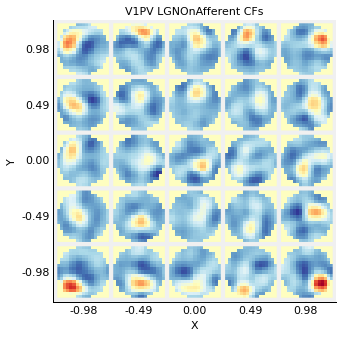

In [120]:
topo.sim.V1PV.LGNOnAfferent.grid(5,5) * topo.sim.V1PV.LGNOffAfferent.grid(5,5)

:GridSpace   [X,Y]
   :HoloMap   [Time]
      :CFView   [x,y]   (z)
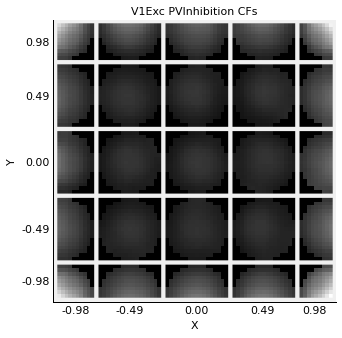

In [121]:
topo.sim.V1Exc.PVInhibition.grid(5,5)

:GridSpace   [X,Y]
   :HoloMap   [Time]
      :Overlay
         .CF_Weight.LGNOnAfferent  :CFView   [x,y]   (z)
         .CF_Weight.LGNOffAfferent :CFView   [x,y]   (z)
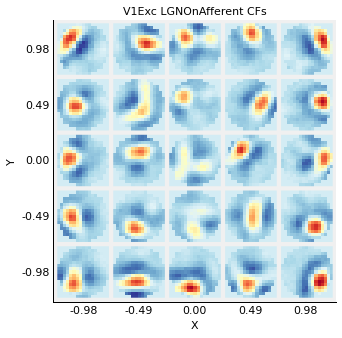

In [129]:
topo.sim.V1Exc.LGNOnAfferent.grid(5,5) * topo.sim.V1Exc.LGNOffAfferent.grid(5,5)